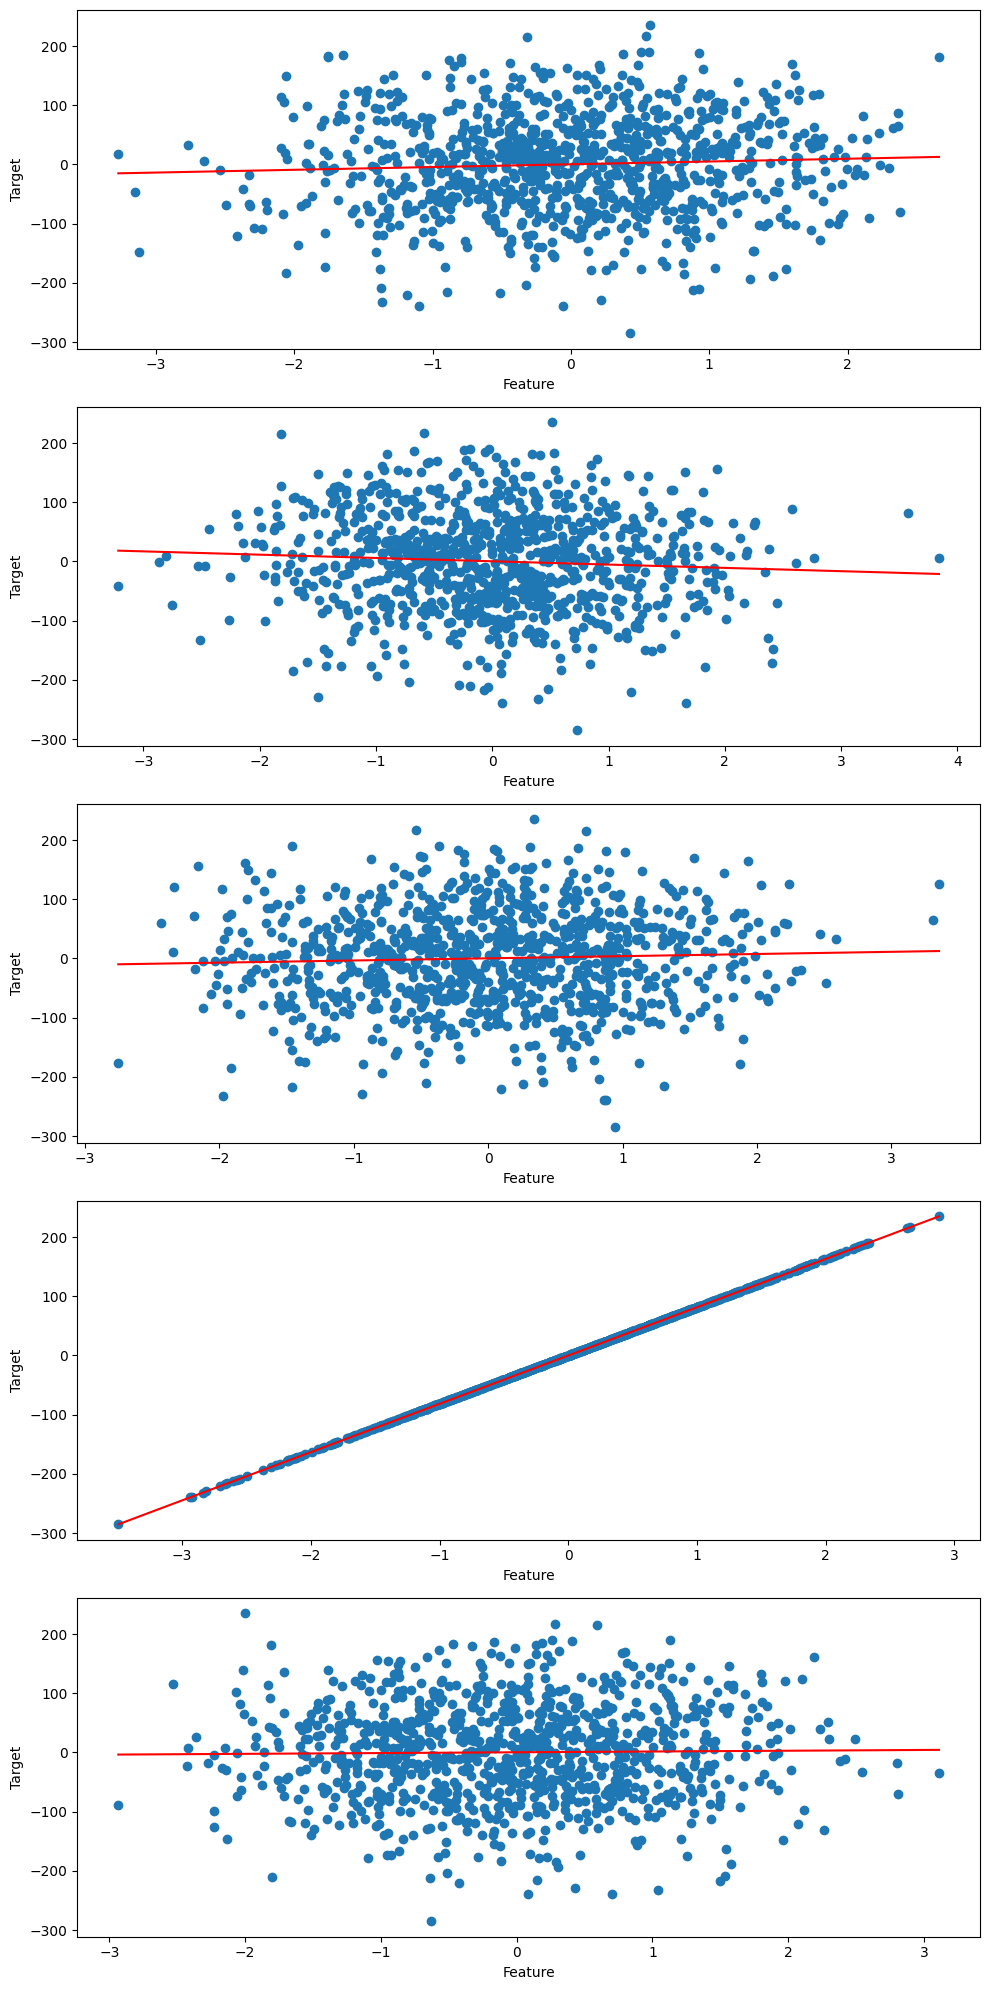

In [22]:
## Question 1

from sklearn.datasets import make_regression as mr
import matplotlib.pyplot as plt
import numpy as np

x,y = mr(n_samples = 1000, n_features = 5, n_informative=1)

fig, axes = plt.subplots(5,1, figsize=(10,20))

for i in range(5):
    axes[i].scatter(x[:, i], y)
    axes[i].set_xlabel('Feature')
    axes[i].set_ylabel('Target')
    
    slope, intercept = np.polyfit(x[:, i], y, 1)

    x_line = np.linspace(np.min(x[:, i]), np.max(x[:, i]), 100)
    y_line = slope * x_line + intercept

    axes[i].plot(x_line, y_line, color='red')

plt.tight_layout()
plt.show()

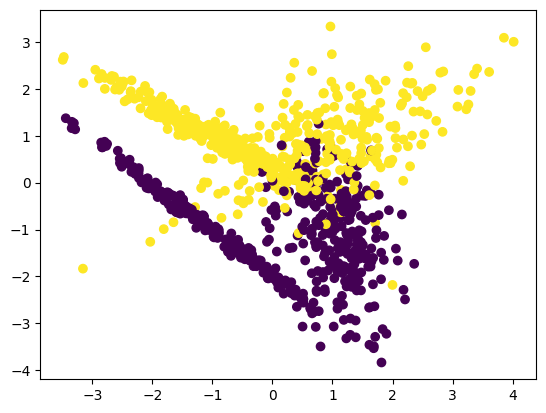

In [23]:
## Question 2

from sklearn.datasets import make_classification as mc
import matplotlib.pyplot as plt

x,y = mc(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_classes=2, n_clusters_per_class=2)
plt.scatter(x[:,0], x[:,1], c=y)
plt.show()

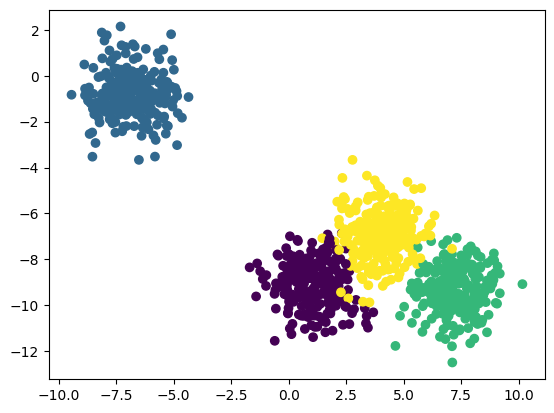

In [24]:
## Question 3

from sklearn.datasets import make_blobs as mb
import matplotlib.pyplot as plt

x,y = mb(n_samples=1000, centers=4, n_features=2)
plt.scatter(x[:,0], x[:,1], c=y) 
plt.show()

In [25]:
## Question 4

#table tr-> headers has th and rows has td tags

import requests as req
from bs4 import BeautifulSoup
import pandas as pd

page = page = req.get('https://www.worldometers.info/coronavirus/')
soup = BeautifulSoup(page.text, 'lxml')

table = soup.find('table', class_='table table-bordered table-hover main_table_countries')

headers = []
for i in table.find_all('th'):
    title = i.text
    headers.append(title)

rows = table.find_all('tr')
df = pd.DataFrame(columns=headers)

for i in rows[1:]:
    data = i.find_all("td")
    row = [tr.text for tr in data]
    l = len(df)
    df.loc[l] = row

df.rename(columns={'Country,Other': 'Country'}, inplace=True)

df_final = df.loc[:,('Country','Population', 'Continent', 'TotalCases', 'NewCases', 'TotalDeaths', 'NewDeaths', 'TotalRecovered', 'NewRecovered', 'ActiveCases')]
df_final

,Country,Population,Continent,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases
0,\nNorth America\n,,North America,"126,646,685","+1,400","1,632,538",+5,"122,486,691","+1,057","2,527,456"
1,\nAsia\n,,Asia,"217,262,531","+4,273","1,546,148",+20,"200,984,639","+24,240","14,731,744"
2,\nEurope\n,,Europe,"249,247,838",+418,"2,059,482",+1,"245,189,859","+13,528","1,998,497"
3,\nSouth America\n,,South America,"68,671,784",+66,"1,355,254",,"66,459,531",+123,"856,999"
4,\nOceania\n,,Australia/Oceania,"14,309,490",+9,"27,779",,"14,137,852",+7,"143,859"
...,...,...,...,...,...,...,...,...,...,...
242,Total:,,South America,"68,671,784",+66,"1,355,254",,"66,459,531",,"856,999"
243,Total:,,Australia/Oceania,"14,309,490",+9,"27,779",,"14,137,852",,"143,859"
244,Total:,,Africa,"12,823,208",+3,"258,762",,"12,085,186",,"479,260"
245,Total:,,,721,,15,,706,,0


Counter({0: 9500, 1: 500})


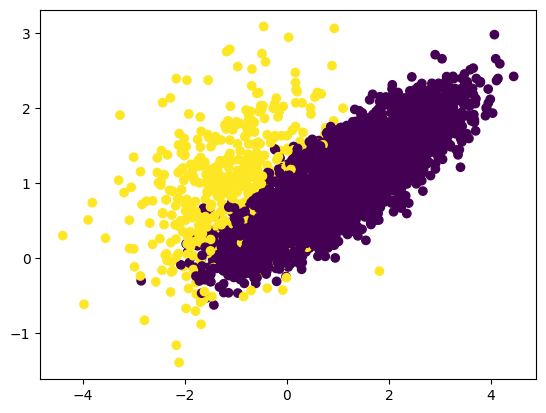

Counter({0: 7497, 1: 2499})


In [28]:
### Question 5

from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
import matplotlib.pyplot as plt
from numpy import where

# define dataset
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0, n_classes=2,
n_clusters_per_class=1, weights=[0.95], flip_y=0, random_state=1)

counter = Counter(y)
print(counter)

# plot inital data
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

over = SMOTE(sampling_strategy=0.26315789473)
under = RandomUnderSampler(sampling_strategy=0.333333)
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)

# transform data
X, y = pipeline.fit_resample(X, y)

counter = Counter(y)
print(counter)

In [29]:
## Question 6

from sklearn.datasets import load_iris
import pandas as pd
from sklearn.model_selection import train_test_split

iris = load_iris()

X = iris.data
y = iris.target

df = pd.DataFrame(X)
print(df.head())

#check for missing values
print(df.isna().sum()) #no missing values

# split data into training(80%) and testing sets
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3)

#shapes of training set ans testing set
print("Training set shapes:", Xtrain.shape, ytrain.shape)
print("Testing set shapes:", Xtest.shape, ytest.shape)

     0    1    2    3
0  5.1  3.5  1.4  0.2
1  4.9  3.0  1.4  0.2
2  4.7  3.2  1.3  0.2
3  4.6  3.1  1.5  0.2
4  5.0  3.6  1.4  0.2
0    0
1    0
2    0
3    0
dtype: int64
Training set shapes: (105, 4) (105,)
Testing set shapes: (45, 4) (45,)
